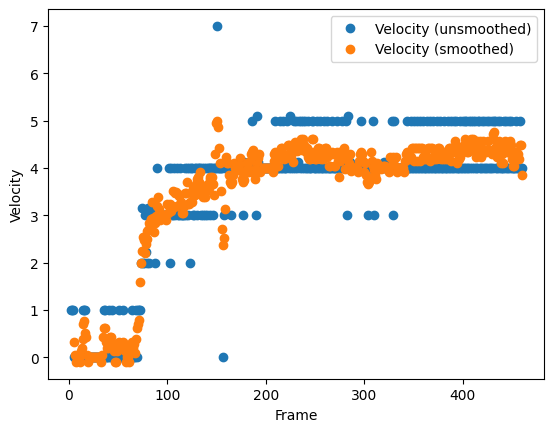

In [2]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Load data into a pandas dataframe
df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

# Compute velocity by differentiating the position
dx = df['x'].diff()
dy = df['y'].diff()
df['velocity'] = np.sqrt(dx**2 + dy**2)

# Smooth the velocity data using a Savitzky-Golay filter
window_size = 7
poly_order = 3
df['smooth_velocity'] = savgol_filter(df['velocity'], window_size, poly_order)

# Plot the velocity data
import matplotlib.pyplot as plt

plt.plot(df['frame'], df['velocity'], label='Velocity (unsmoothed)', marker='o', linestyle='None')
plt.plot(df['frame'], df['smooth_velocity'], label='Velocity (smoothed)', marker='o', linestyle='None')
plt.xlabel('Frame')
plt.ylabel('Velocity')
plt.legend()
plt.show()


/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_45167/1758450047.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled["time"] = df_sampled["frame"].shift(-1) - df_sampled["frame"].shift(-1).iloc[0]
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_45167/1758450047.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled["velocity"] = velocity


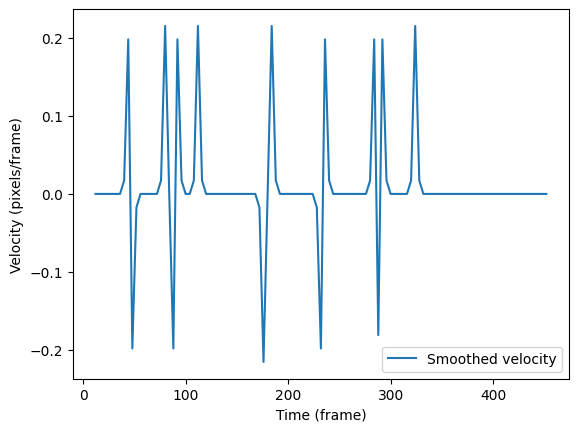

In [3]:
# Sampling every 4th point

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the position data into a pandas DataFrame
df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

# Select every 4th row of the position data
df_sampled = df[::4]

# Calculate the time difference between each pair of consecutive position measurements
time_diff = df_sampled["frame"].diff()

# Calculate the velocity using the difference of position values and the time difference
velocity = df_sampled["y"].diff() / time_diff

# Add a time column to the velocity data
df_sampled["time"] = df_sampled["frame"].shift(-1) - df_sampled["frame"].shift(-1).iloc[0]
df_sampled["velocity"] = velocity

# Remove the NaN value in the first row
df_sampled = df_sampled.dropna()

# Smooth the velocity data using a moving average filter
window_size = 3
df_sampled["smoothed_velocity"] = df_sampled["velocity"].rolling(window=window_size, win_type='hamming').mean()

# Plot the velocity data
plt.plot(df_sampled["time"], df_sampled["smoothed_velocity"], label="Smoothed velocity")
plt.xlabel("Time (frame)")
plt.ylabel("Velocity (pixels/frame)")
plt.legend()
plt.show()


In [8]:
# Making a new file by sampling every 5th point of droplet_posn_time.txt


df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])

sample_rate = 10
sampled_df = df[::sample_rate]

# write new_df to a file
with open('droplet_posn_time_sampled.txt', 'w') as f:
    f.write("frame" + ' ' + "x" + ' ' + "y" + ' ' + "width" + ' ' + "height" + ' ' + "deformation" + '\n')
    for frame, x, y, width, height, deformation in zip(sampled_df['frame'], sampled_df['x'], sampled_df['y'], sampled_df['width'], sampled_df['height'], sampled_df['deformation']):
        f.write(str(frame) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' ' + str(deformation) + '\n')
        
sampled_df

,frame,x,y,width,height,deformation
0,1.0,214,617,45.000000,44.000000,0.011236
10,11.0,213,617,45.000000,46.000000,0.010989
20,21.0,214,617,47.000000,47.000000,0.000000
30,31.0,214,617,45.000000,45.000000,0.000000
40,41.0,214,618,45.000000,46.000000,0.010989
50,51.0,215,617,45.000000,46.000000,0.010989
60,61.0,214,617,46.000000,46.000000,0.000000
70,71.0,218,617,46.000000,45.000000,0.010989
80,81.0,241,618,45.000000,46.000000,0.010989
90,91.0,270,618,45.000000,48.000000,0.032258


/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_45167/3285264084.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['velocity'] = sampled_dx/sample_rate
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_45167/3285264084.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['moving_average_velocity'] = sampled_df['velocity'].rolling(window=5, win_type='hamming').mean()
/var/folders/hm/q640jb6j027820lr95_n7w9m0000gn/T/ipykernel_45167/3285264084.py:28: SettingWithCopy

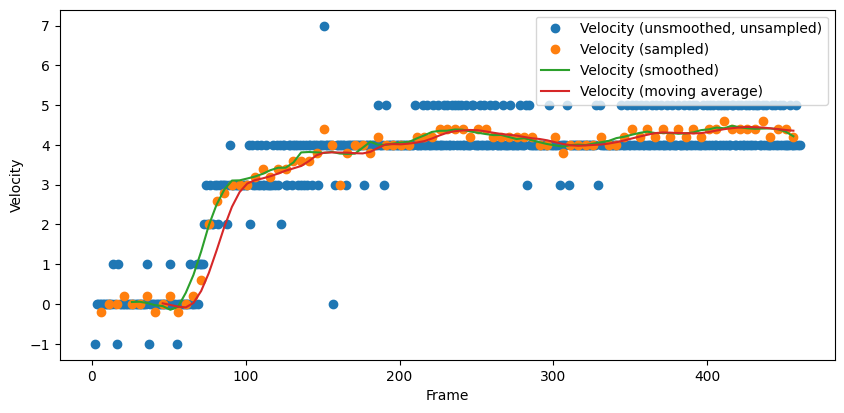

In [9]:
# plot frame vs x from sampled_df

import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

df = pd.read_csv('droplet_posn_time.txt', sep='\t', skiprows=1, header=None, 
                 names=['frame', 'x', 'y', 'width', 'height', 'deformation'])
dx = df['x'].diff()
# dy = df['y'].diff()
# df['velocity'] = np.sqrt(dx**2 + dy**2)
df['velocity'] = dx

sample_rate = 5
sampled_df = df[0::sample_rate]

# Compute velocity by differentiating the position
sampled_dx = sampled_df['x'].diff()
# sampled_dy = sampled_df['y'].diff()
# sampled_df['velocity'] = np.sqrt(sampled_dx**2 + sampled_dy**2)/sample_rate
sampled_df['velocity'] = sampled_dx/sample_rate

sampled_df['moving_average_velocity'] = sampled_df['velocity'].rolling(window=5, win_type='hamming').mean()

# Smooth the velocity data using a Savitzky-Golay filter
window_size = 10
poly_order = 3
sampled_df['smooth_velocity'] = savgol_filter(sampled_df['velocity'], window_size, poly_order)
sampled_df['moving_average_smooth_velocity'] = savgol_filter(sampled_df['moving_average_velocity'], window_size, poly_order)


# Plot the velocity data
import matplotlib.pyplot as plt

# multiplot
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(df['frame'], df['velocity'], label='Velocity (unsmoothed, unsampled)', marker='o', linestyle='None')
plt.plot(sampled_df['frame'], sampled_df['velocity'], label='Velocity (sampled)', marker='o', linestyle='None')
plt.plot(sampled_df['frame'], sampled_df['smooth_velocity'], label='Velocity (smoothed)')
plt.plot(sampled_df['frame'], sampled_df['moving_average_smooth_velocity'], label='Velocity (moving average)')
plt.xlabel('Frame')
plt.ylabel('Velocity')
plt.legend()
plt.show()


## Spline

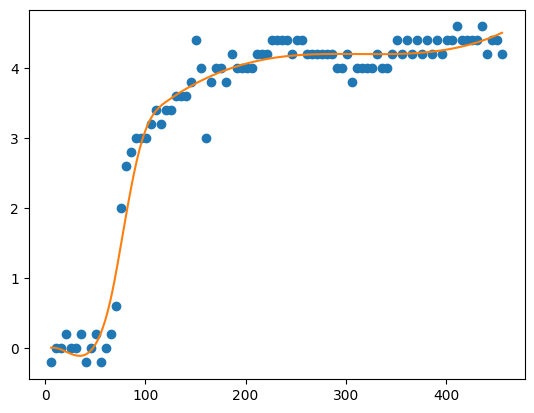

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline, LSQUnivariateSpline

df = pd.DataFrame({'frame': sampled_df['frame'], 'velocity': sampled_df['velocity']})
df = df.dropna(subset=['velocity'])

t = df['frame']
v = df['velocity']

# Univariate spline
spline = UnivariateSpline(t, v, s=5)
t_spline = np.linspace(t.min(), t.max(), 1000)
v_spline = spline(t_spline)

# Set smoothing factor method
spline.set_smoothing_factor(0.05)

# Plot the data and the spline
plt.plot(t, v, 'o', label='data')
plt.plot(t_spline, v_spline, label='spline')



# Kalman Filter Python


In [6]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [7]:
# Compute measure

# getMeasurement used to simulate sensor providing real-time posn time data of an automobile at 60m/s
def getMeasurement():
    # initialize the current position at 0 velocity at 60 m/s
    if updateNumber == 1:
        getMeasurement.currentPosition = 0
        getMeasurement.currentVelocity = 60 # m/s
        
    dt = 0.1
    
    # random noise v computed and added to pos'n measurement
    v = 8 * np.random.randn(1)
    # additional random noise w computed and added to velocity to account for small random accelerations
    w = 8 * np.random.randn(1)
    
    z = getMeasurement.currentPosition + getMeasurement.currentVelocity * dt + v
    getMeasurement.currentPosition = z - v
    getMeasurement.currentVelocity = 60 + w

    # retain current position and velocity for next iteration
    return [z, getMeasurement.currentPosition, getMeasurement.currentVelocity]

Filtering Measurements:

When first measurement is reported, filter is initialized: measurement is as follows
- $z = pos_m \equiv$ posn measurement
- $R = \sigma_{pos_{m}}^2 \equiv$ posn variance
- $t = t_m \equiv$ timestamp of the measurement
- $x = \begin{bmatrix} pos \\ vel \end{bmatrix} \equiv$ two element state vector for position and velocity
- $P = \begin{bmatrix} \sigma_{pos}^2 & \sigma_{posVel}     \\                      \sigma_{posVel} & \sigma_{vel}^2\end{bmatrix} \equiv$ 2 $\times$ 2 state covariance matrix representing the uncertainty in $\vec{x}$
- $T \equiv$ timestamp for the estimate

In [9]:
# Filter Measurements

def filter(z, updateNumber):
    dt = 0.1
    # Initialize state
    if updateNumber == 1:
        filter.x = np.array([[0],
                             [20]])
        filter.P = np.array([[5, 0],
                             [0, 5]])
        filter.A = np.array([[1, dt],
                             [0, 1]])
        filter.H = np.array([[1, 0]])
        filter.HT = np.array([[1],
                              [0]])
        filter.R = 10
        filter.Q = np.array([[1, 0],
                             [0, 3]])
        
    # Predict state forward
    x_p = filter.A.dot(filter.x)
    # Predict covariance forward
    P_p = filter.A.dot(filter.P).dot(filter.A.T) + filter.Q
    # Compute Kalman gain
    S = filter.H.dot(P_p).dot(filter.HT) + filter.R
    K = P_p.dot(filter.HT)*(1/S)
    
    # Estimate State
    residual = z - filter.H.dot(x_p)
    filter.x = x_p + K*residual
    
    # Estimate covariance
    filter.P = P_p - K.dot(filter.H).dot(P_p)
    
    return [filter.x[0], filter.x[1], filter.P]


In [10]:
# Test the filter

def testFilter():
    dt = 0.1
    t = np.linspace(0, 10, num=300)
    numOfMeasurements = len(t)
    
    measuredTime = []
    measuredPosition = []
    measuredDifferencePosition = []
    estimatedDifferencePosition = []
    estimatedPosition = []
    estimatedVelocity = []
    posBound3Sigma = []
    
    for k in range(1, numOfMeasurements):
        z = getMeasurement(k)
        # Call filter and return new state
        f = filter(z[0], k)
        # Save state for plotting
        measuredTime.append(k)
        measuredPosition.append(z[0])
        measuredDifferencePosition.append(z[0]-z[1])
        
        estimatedDifferencePosition.append(f[0]-z[1])
        estimatedPosition.append(f[0])
        estimatedVelocity.append(f[1])
        
        positionVariance = f[2]
        posBound3Sigma.append(3*np.sqrt(positionVariance[0][0]))
        
    return [measuredTime, measuredPosition, estimatedPosition, estimatedVelocity, measuredDifferencePosition, estimatedDifferencePosition, posBound3Sigma]

In [11]:
# Plot Kalman Filter Results

t = testFilter()

plot1 = plt.figure(1)
plt.scatter(t[0], t[1])
plt.plot(t[0], t[2])
plt.ylabel('Position')
plt.xlabel('Time')
plt.grid(True)

plot2 = plt.figure(2)
plt.plot(t[0], t[3])
plt.ylabel('Velocity $(m/s)$')
plt.xlabel('Update Number')
plt.title('Velocity Estimate for each Measurement Update \n', fontweight='bold')
plt.legend(['Velocity Estimate'])
plt.grid(True)

plot3 = plt.figure(3)
plt.scatter(t[0], t[4], color='red')
plt.plot(t[0], t[5])
plt.legend(['Estimated Position', 'Measured Position'])
plt.title('Position Error for each Measurement Update \n', fontweight='bold')
plt.ylabel('Position Error $(m)$')
plt.xlabel('Update Number')
plt.grid(True)
plt.xlim([0, 300])
plt.show()

TypeError: getMeasurement() takes 0 positional arguments but 1 was given

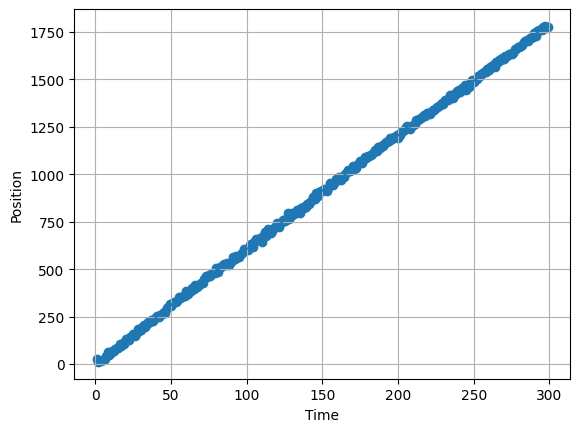

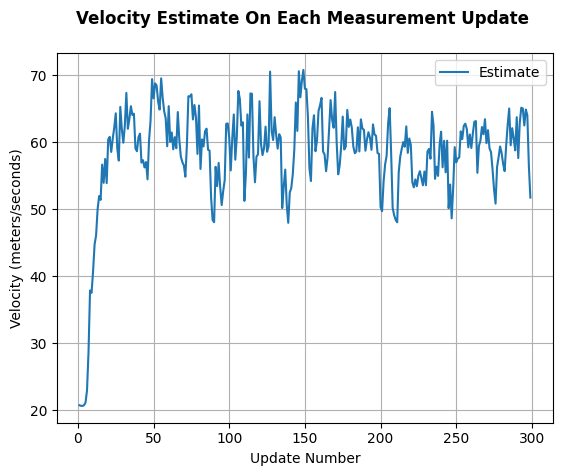

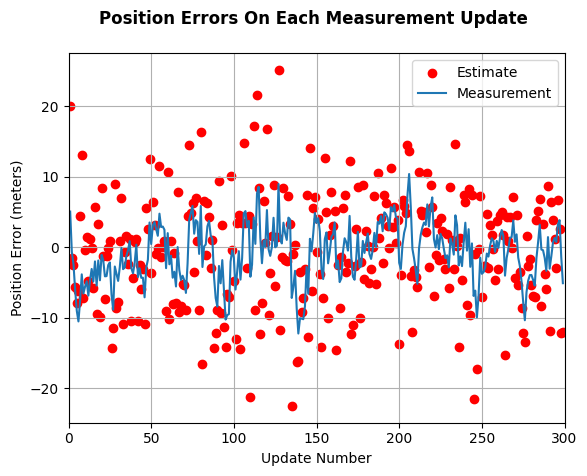

In [13]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

def getMeasurement(updateNumber):
    if updateNumber == 1:
      getMeasurement.currentPosition = 0
      getMeasurement.currentVelocity = 60 # m/s

    dt = 0.1

    w = 8 * np.random.randn(1)
    v = 8 * np.random.randn(1)

    z = getMeasurement.currentPosition + getMeasurement.currentVelocity*dt + v
    getMeasurement.currentPosition = z - v
    getMeasurement.currentVelocity = 60 + w
    return [z, getMeasurement.currentPosition, getMeasurement.currentVelocity]

def filter(z, updateNumber):
    dt = 0.1
    # Initialize State
    if updateNumber == 1:
        filter.x = np.array([[0],
                            [20]])
        filter.P = np.array([[5, 0],
                                 [0, 5]])

        filter.A = np.array([[1, dt],
                             [0, 1]])
        filter.H = np.array([[1, 0]])
        filter.HT = np.array([[1],
                              [0]])
        filter.R = 10
        filter.Q = np.array([[1, 0],
                             [0, 3]])

    # Predict State Forward
    x_p = filter.A.dot(filter.x)
    # Predict Covariance Forward
    P_p = filter.A.dot(filter.P).dot(filter.A.T) + filter.Q
    # Compute Kalman Gain
    S = filter.H.dot(P_p).dot(filter.HT) + filter.R
    K = P_p.dot(filter.HT)*(1/S)

    # Estimate State
    residual = z - filter.H.dot(x_p)
    filter.x = x_p + K*residual

    # Estimate Covariance
    filter.P = P_p - K.dot(filter.H).dot(P_p)

    return [filter.x[0], filter.x[1], filter.P];

def testFilter():
    dt = 0.1
    t = np.linspace(0, 10, num=300)
    numOfMeasurements = len(t)

    measTime = []
    measPos = []
    measDifPos = []
    estDifPos = []
    estPos = []
    estVel = []
    posBound3Sigma = []

    for k in range(1,numOfMeasurements):
        z = getMeasurement(k)
        # Call Filter and return new State
        f = filter(z[0], k)
        # Save off that state so that it could be plotted
        measTime.append(k)
        measPos.append(z[0])
        measDifPos.append(z[0]-z[1])
        estDifPos.append(f[0]-z[1])
        estPos.append(f[0])
        estVel.append(f[1])
        posVar = f[2]
        posBound3Sigma.append(3*np.sqrt(posVar[0][0]))

    return [measTime, measPos, estPos, estVel, measDifPos, estDifPos, posBound3Sigma];

t = testFilter()

plot1 = plt.figure(1)
plt.scatter(t[0], t[1])
plt.plot(t[0], t[2])
plt.ylabel('Position')
plt.xlabel('Time')
plt.grid(True)

plot2 = plt.figure(2)
plt.plot(t[0], t[3])
plt.ylabel('Velocity (meters/seconds)')
plt.xlabel('Update Number')
plt.title('Velocity Estimate On Each Measurement Update \n', fontweight="bold")
plt.legend(['Estimate'])
plt.grid(True)

plot3 = plt.figure(3)
plt.scatter(t[0], t[4], color = 'red')
plt.plot(t[0], t[5])
plt.legend(['Estimate', 'Measurement'])
plt.title('Position Errors On Each Measurement Update \n', fontweight="bold")
#plt.plot(t[0], t[6])
plt.ylabel('Position Error (meters)')
plt.xlabel('Update Number')
plt.grid(True)
plt.xlim([0, 300])
plt.show()